# Python tutorial 1.2 - **Image segmentation and tracking** (Solutions)

## **Trajectories analysis for videos tracked with idtracker.ai**

------
## UQ-Bio Summer School
## 2023, June 1
------

```
Instructor:Ana Carolina Pádua
Contact: carolina.padua@research.fchampalimaud.org

Champalimaud Center for the Unknown, Lisbon (Portugal)
Research group: Mathematics of collective behavior and intelligence
```


In [ ]:
#solution ex1
print("The median body length of the animals in the video is", tr.params['body_length_px'], "pixels")

The median body length of the animals in the video is 165.0 pixels


### **Ex 2**: 
Get an array that contains the position of all the animals in the video frame nr. 5

In [ ]:
# solution ex2

In [ ]:
#solution ex2

tr.s[5,...]
#or
tr.s[5][:][:]

array([[1010.81061299, 2202.50198231],
       [2961.40409164, 2845.49082763],
       [1421.72333554, 2673.08456287],
       [2510.38446215, 2823.6984654 ],
       [1212.42989828, 2414.41987321],
       [1575.30028011, 2363.42296919],
       [1412.8084042 , 2157.38877772],
       [1371.65133038, 2326.37148928],
       [1977.53399751, 2136.44192611],
       [2569.87552364, 2192.89011071],
       [2180.43572882, 3106.1322217 ],
       [1700.9476909 , 1834.35262917]])

### **Ex 3**:

Get an array that contains the velocity vector of animal 2 (only) in all video frames 

In [ ]:
# solution ex 3

In [ ]:
#solution ex3
tr.v[:,2,:]

array([[-30.59595869, -19.72625768],
       [-31.48642803, -23.1500454 ],
       [-34.42833343, -28.70748147],
       ...,
       [ 24.97041988,  37.97881881],
       [ 22.31276819,  39.43359191],
       [ 21.31089675,  40.47306522]])

### **Ex 4:**

Get an array that contains the acceleration of all the animals in the first video frame

In [ ]:
# solution ex4

In [ ]:
#solution ex4
tr.a[0][:][:]
#or
tr.a[0,:,:]
#or / equivalent to 
tr.a[0,...]

array([[ 0.4544176 , -0.7403852 ],
       [ 0.15493236, -0.25434995],
       [ 9.18000078,  1.31082578],
       [ 3.2468973 ,  0.24323533],
       [-3.42576192, -1.82591099],
       [-3.75725116,  5.40025425],
       [-3.65317905,  1.35774774],
       [-2.11839526,  0.37791796],
       [-1.91454049,  0.62530376],
       [ 1.67648758, -3.36206189],
       [ 0.17554701,  1.46153309],
       [ 3.55094999,  3.40649773]])

## Summary about position, velocity and acceleration

### **Ex 5**:

Complete the following sentenses using the Trajectories' properties. 

In [ ]:
# solution ex5
print("Loading trajectories from: ", tr.params['path'])
print("Positions array shape ", tr.s.shape)
print("Velocities array shape ", tr.v.shape)
print("Accelerations array shape ", tr.a.shape)
print('\n')
print('Positions:')
print('X range:', np.nanmin(tr.s[...,0]), np.nanmax(tr.s[...,0]), 'pixels')
print('Y range:', np.nanmin(tr.s[...,1]), np.nanmax(tr.s[...,1]), 'pixels')
print('\n')
print('Velocities:')
print('X range:', np.nanmin(tr.v[...,0]), np.nanmax(tr.v[...,0]), 'pixels/frame')
print('Y range:', np.nanmin(tr.v[...,1]), np.nanmax(tr.v[...,1]), 'pixels/frame')
print('\n')
print('Accelerations:')
print('X range:', np.nanmin(tr.a[...,0]), np.nanmax(tr.a[...,0]), '$pixels/frame^2$')
print('Y range:', np.nanmin(tr.a[...,1]), np.nanmax(tr.a[...,1]), '$pixels/frame^2$')

Loading trajectories from:  ./trajectories_wo_gaps/twg_GD_20221227_A.npy
Positions array shape  (38426, 12, 2)
Velocities array shape  (38426, 12, 2)
Accelerations array shape  (38426, 12, 2)


Positions:
X range: 655.7834265790967 3570.2797335150276 pixels
Y range: 492.28014284371767 3408.0244298656667 pixels


Velocities:
X range: -115.7656125476476 123.80373814713062 pixels/frame
Y range: -122.24575969937035 206.74575969937035 pixels/frame


Accelerations:
X range: -323.1164940077183 203.55824700385915 $pixels/frame^2$
Y range: -298.4915193987408 573.9830387974814 $pixels/frame^2$


# Plotting trajectories

Plots the trajectory of each animal along a specific time range of the video `twg_GD_20221227_A.npy`. Each animal trajectory is represented by a different color.´

---



### **Ex 6:** 

Plot each animal trajectory in a separated plot. One figure dedicated to each one of the animal's trajectory. 

In [ ]:
#solution ex6
def plot_individual_trajectories(tr):
    time_range= (0, 300) # SET HERE THE RANGE IN SECONDS FOR WHICH YOU WANT TO PLOT THE POSITIONS
    file_name = tr.params['path']
    get_name = file_name.split("/")
    img_name = get_name[-1][0:-4]
    frame_range = range(time_range[0]*tr.params['frame_rate'], time_range[1]*tr.params['frame_rate'],1)

    for focal in range(tr.number_of_individuals):
        plt.figure(figsize=(10,10))
        plt.plot(tr.s[frame_range,focal,0], tr.s[frame_range,focal,1])
        #plt.set_aspect('equal','box')
        plt.title('Trajectories of ' + img_name + "\nFish: " + str(focal+1), fontsize=14)
        plt.xlabel('X (BL)',fontsize=24)
        plt.ylabel('Y (BL)',fontsize=24)

        path_output = './output/'
        plt.savefig(path_output + "individual_traject_" + img_name + "_fish_" + str(focal+1))

In [ ]:
plot_individual_trajectories(tr)

Output hidden; open in https://colab.research.google.com to view.

### **Ex 7**:

Create a funtion named plot_main_metrics, following the conditons:
* Input: file_name
* Output: One plot with 3 subplots. The subplots share the x axis, which represents the time (s). The Y axis of the 3 subplots should represent:
 - 1) The average group **distance to the origin** ($BL$)
 - 2) The **speed** of all the animal, each one represented by a different colors ($BL/s$)
 - 3) The **acceleration** of each animal ($BL/s^2$)

In [ ]:
def plot_main_metrics(tr):

    fig, ax = plt.subplots(3,figsize=(15,15), sharex=True)
    time_range= (0, 30) # SET HERE THE RANGE IN SECONDS FOR WHICH YOU WANT TO PLOT THE VARIABLES
    frame_range = range(time_range[0]*tr.params['frame_rate'], time_range[1]*tr.params['frame_rate'],1)

    get_name = file_name.split("/")
    img_name = get_name[-1][0:-4]

    for focal in range(tr.number_of_individuals):
        ax[0].plot(np.asarray(frame_range)/tr.params['frame_rate'],tr.distance_to_origin[frame_range, focal])
        ax[1].plot(np.asarray(frame_range)/tr.params['frame_rate'],tr.speed[frame_range, focal])
        ax[2].plot(np.asarray(frame_range)/tr.params['frame_rate'],tr.acceleration[frame_range, focal])
        plt.subplots_adjust(hspace = 1.)

        ax[0].set_xlabel('t (s)',fontsize=14)
        ax[0].set_ylabel('Distance to origin (BL)',fontsize=14)
        ax[0].tick_params(labelsize=14)
        #ax[0].set_ylim((0,np.nanmax(tr.distance_to_origin)))

        ax[1].set_xlabel('t (s)',fontsize=14)
        ax[1].set_ylabel('Speed (BL/s)',fontsize=14)
        ax[1].tick_params(labelsize=14)
        #ax[1].set_ylim((0,np.nanmax(tr.speed)))

        ax[2].set_xlabel('t (s)',fontsize=14)
        ax[2].set_ylabel(r'Acceleration ($BL/s^2$)',fontsize=14)
        ax[2].tick_params(labelsize=14)
        #ax[2].set_ylim((0,np.nanmax(tr.acceleration)))

    path_output = './output/'
    fig.savefig(path_output + "dst_speed_acc_" + img_name)

Run the function *plot_main_metrics(trajectories)*

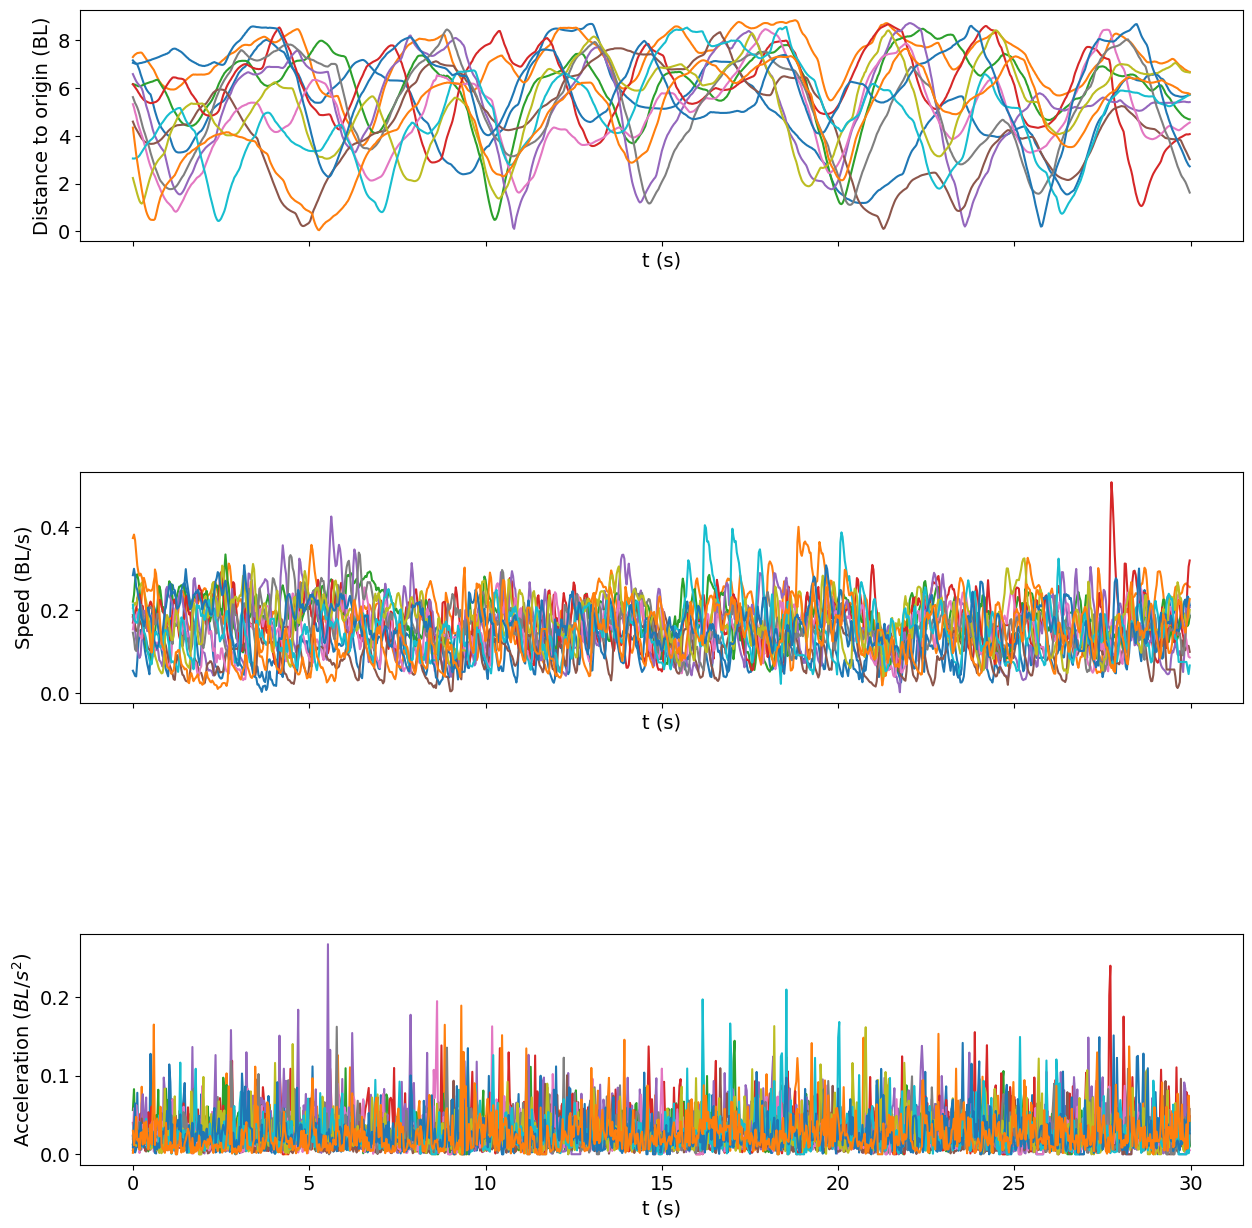

In [ ]:
plot_main_metrics(tr)

# Working with multiple videos

If you recorded several videos during your experiment and you want to apply a similar data analysis to all your files. You can iterate over your experimental files using a *for loop*.

Create a list with the files of the experiment

---



In [ ]:
trajectories_files = ['./trajectories_wo_gaps/twg_GD_20221227_A.npy', './trajectories_wo_gaps/twg_GD_20221227_B.npy']

*for file_name in trajectories_files:*    
        # Load trajectory
        # plots main metrics 




### **Ex 8**:

Compare with the previous plot and check if it looks the same. Why?

Add an additional step, so that the units in the subplot units are in $BL$, $BL/s$ and $BL/s^2$ respectively (instead of pixels)

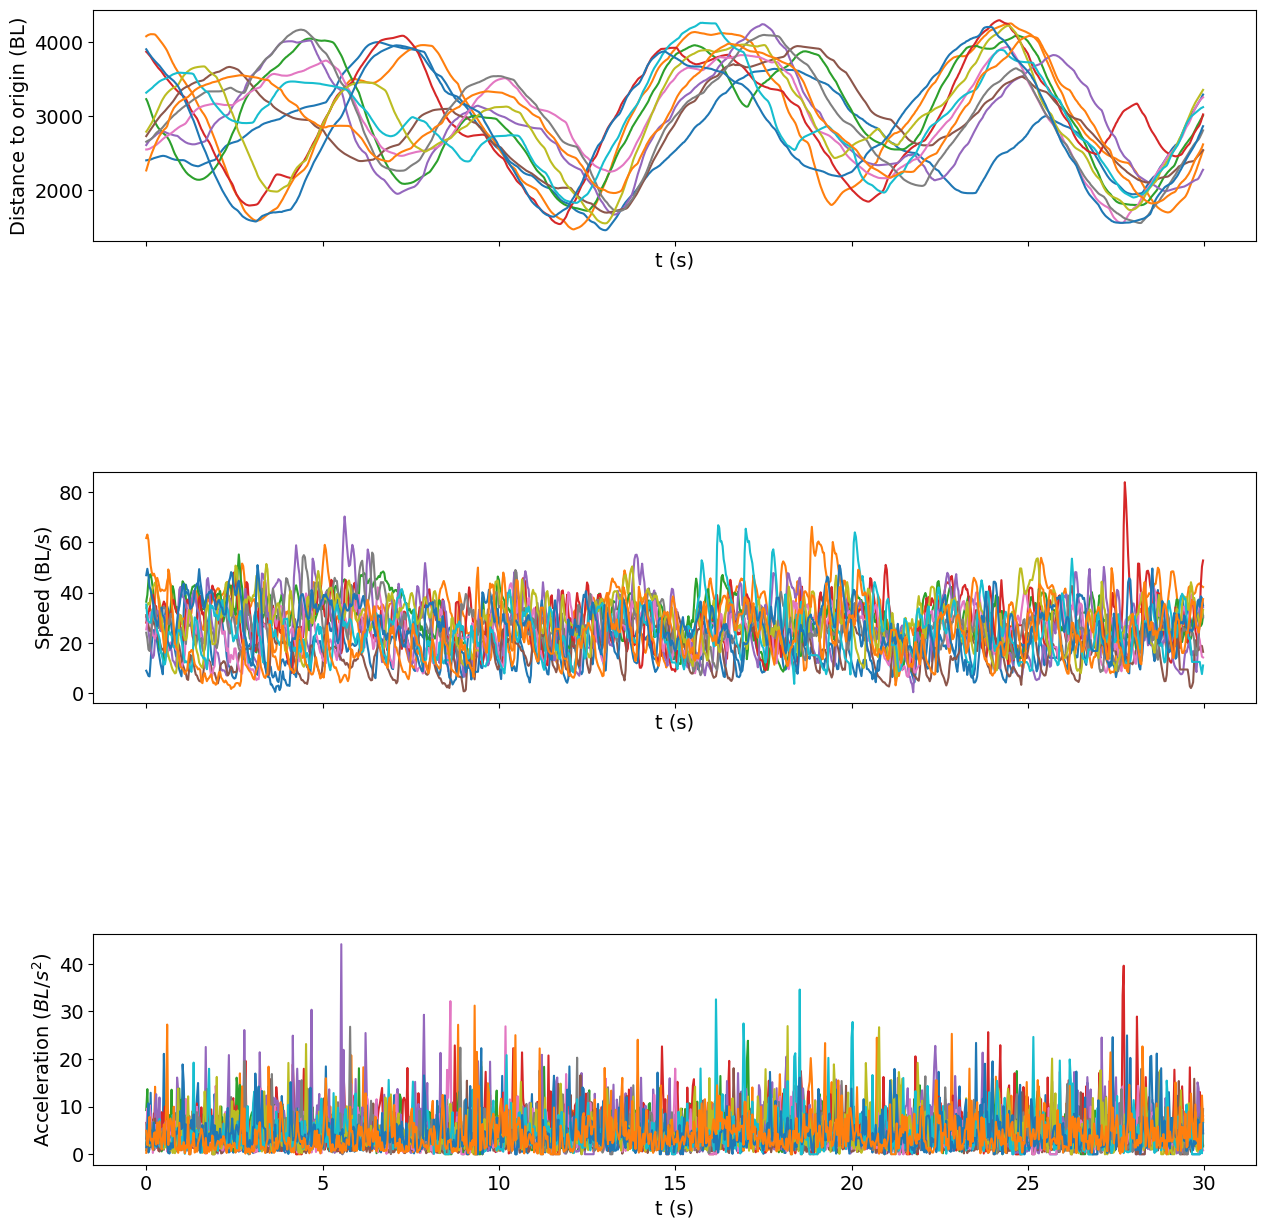

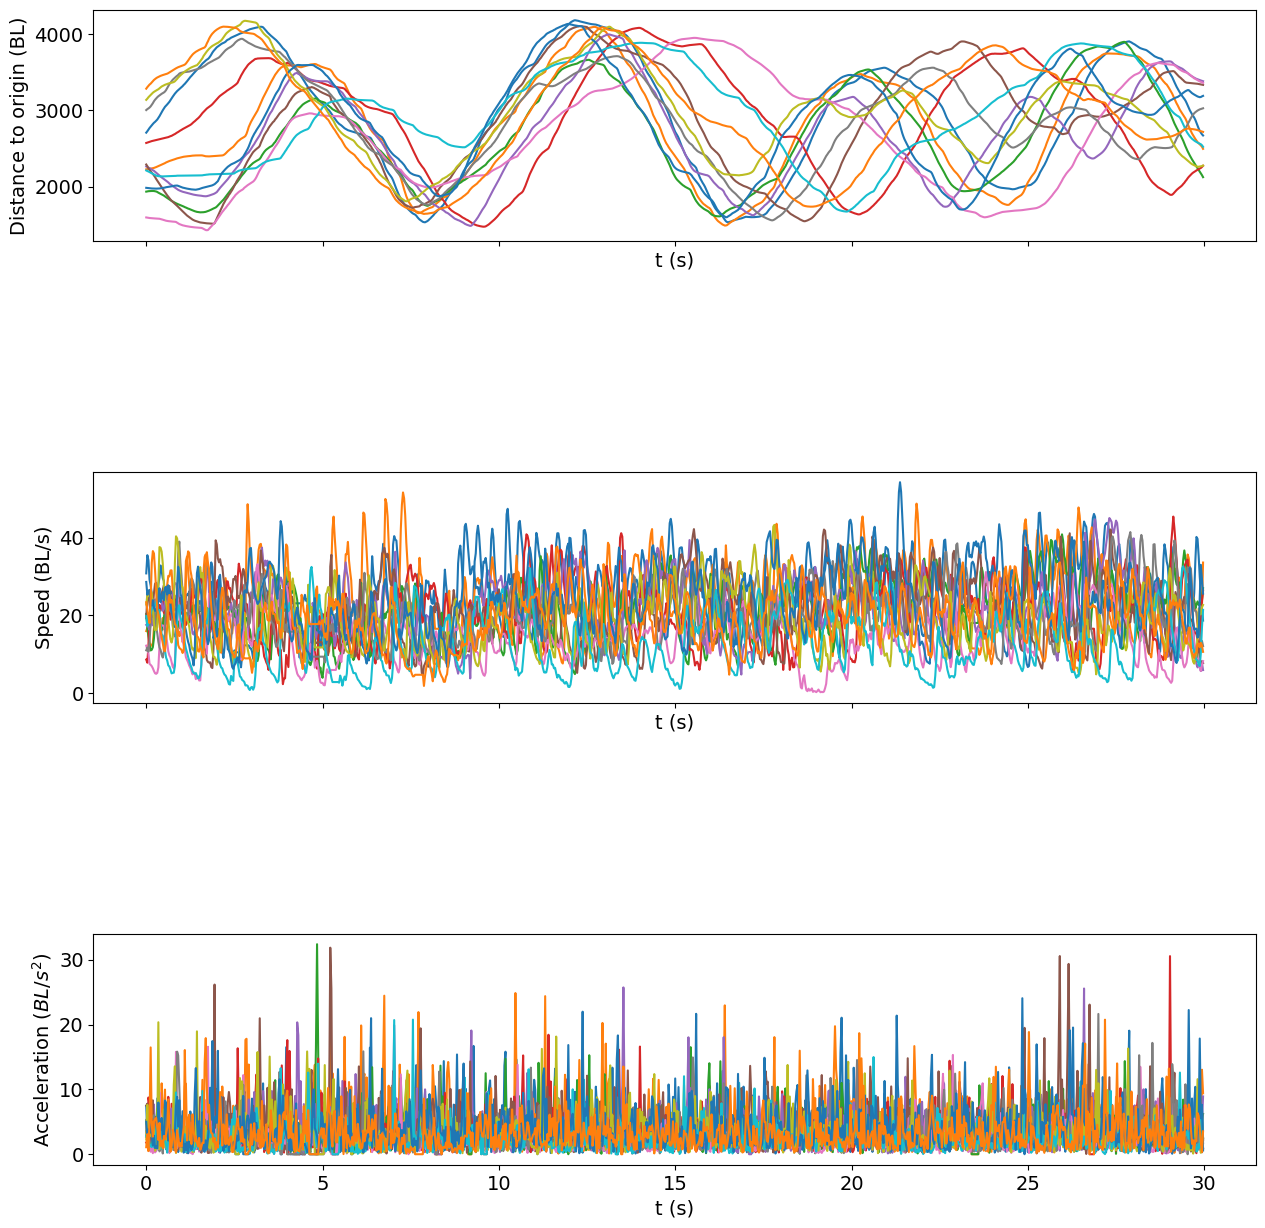

In [ ]:
for file_name in trajectories_files: 
  tr = tt.Trajectories.from_idtrackerai(file_name, 
                                      interpolate_nans=True,
                                      smooth_params={'sigma': 0})
  # add1
  center, radius = tr.estimate_center_and_radius_from_locations(in_px=True)
  tr.origin_to(center)


  #add 2
  body_length = tr.params['body_length_px']
  tr.new_length_unit(body_length, 'BL')
  
  plot_main_metrics(tr)


In [ ]:
# don't forget to load file B in the cell that gets the npy files from github

This notebook shows different analysis routines for trajectories of groups extracted with [idtracker.ai](idtracker.ai). If you use this code and/or data generated with [idtracker.ai](idtracker.ai), please cite:

**Romero-Ferrero, F., Bergomi, M.G., Hinz, R.C., Heras, F.J.H., de Polavieja, G.G., Nature Methods, 2019. idtracker.ai: tracking all individuals in small or large collectives of unmarked animals (F.R.-F. and M.G.B. contributed equally to this work. Correspondence should be addressed to G.G.d.P: gonzalo.polavieja@neuro.fchampalimaud.org)**

Some of the methods in this script are also available as part of a Matlab toolkit, idSocial (http://www.idtracker.es/idsocial) that was used and developed for the analysis of the article

**Hinz, R. C., & de Polavieja, G. G. (2017). Ontogeny of collective behavior reveals a simple attraction rule. Proceedings of the National Academy of Sciences, 201616926.** 

To load and analyse the trajectories we will be using the python library *trajectorytools*, you can install with `pip install trajectorytools`. If you use it, please cite:

**Heras, F. J. H., Romero-Ferrero, F., Hinz, R. C., & de Polavieja, G. G. (2019). Deep attention networks reveal the rules of collective motion in zebrafish. PLoS computational biology, 15(9), e1007354.**